import the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

train_dir = './Dataset/Original Images/Original Images'

generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1 
)

In [3]:
# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"
)

val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation" 
)
classes = list(train_ds.class_indices.keys())

Found 2318 images belonging to 31 classes.
Found 244 images belonging to 31 classes.


In [5]:
vgg = VGG16(input_shape=[128, 128] + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(31, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model created successfully.")

model.summary()

BATCH_SIZE = 16
history = model.fit(train_ds, epochs = 100, validation_data=val_ds, batch_size=16)



Model created successfully.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │       253,983 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,968,671 (57.10 MB)

 Trainable params: 253,983 (992.12 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100


C:\Users\Tara\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.1068 - loss: 3.4026 - val_accuracy: 0.2664 - val_loss: 2.5407
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.4063 - loss: 2.0435 - val_accuracy: 0.3074 - val_loss: 2.3571
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.5448 - loss: 1.5560 - val_accuracy: 0.3320 - val_loss: 2.0794
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.6412 - loss: 1.2547 - val_accuracy: 0.3648 - val_loss: 2.0998
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.7297 - loss: 1.0541 - val_accuracy: 0.4262 - val_loss: 2.0999
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7588 - loss: 0.9153 - val_accuracy: 0.3689 - val_loss: 2.0759
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.8144 - loss: 0.7595 - val_accuracy: 0.3566 - val_loss: 2.1194
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.8443 - loss: 0.6584 - val_accuracy: 0.3607 - val_l

73/73 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9883 - loss: 0.0418
Training Accuracy:  98.96
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4620 - loss: 2.6099
Validation Accuracy:  98.96
Found 244 images belonging to 31 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4271 - loss: 3.0110
Test Accuracy: 45.90%


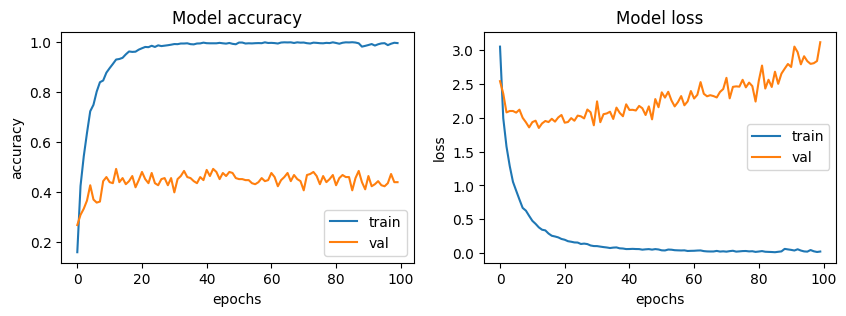

In [6]:

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")    


validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {train_accuracy*100: .2f}")

test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")